In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

"timestamp" - timestamp field for grouping the data

"cnt" - the count of a new bike shares

"t1" - real temperature in C

"t2" - temperature in C "feels like"

"hum" - humidity in percentage

"wind_speed" - wind speed in km/h

"weather_code" - category of the weather

"is_holiday" - boolean field - 1 holiday / 0 non holiday

"is_weekend" - boolean field - 1 if the day is weekend

"season" - category field meteorological seasons: 0-spring;1-summer; 2-fall; 3-winter.

"weather_code" category description: 1 = Clear ;mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity, 2 = scattered clouds / few clouds 3 = Broken clouds, 4 = Cloudy, 7 = Rain/ light Rain shower/ Light rain, 10 = rain with thunderstorm, 26 = snowfall, 94 = Freezing Fog

In [ ]:
df = pd.read_csv('london_merged.csv')

In [ ]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
17409,False
17410,False
17411,False
17412,False


In [ ]:
df = df.rename(columns={'cnt': 'Count', 't1': 'Temperature(Real)', 't2': 'Temperature(FeelsLike)', 'hum': 'Humidity', 'wind_speed': 'WindSpeed', 'weather_code': 'WeatherCode', 'is_holiday': 'Holiday', 'is_weekend': 'Weekend', 'season': 'Seasons'})
print(df.head())

             timestamp  Count  Temperature(Real)  Temperature(FeelsLike)  \
0  2015-01-04 00:00:00    182                3.0                     2.0   
1  2015-01-04 01:00:00    138                3.0                     2.5   
2  2015-01-04 02:00:00    134                2.5                     2.5   
3  2015-01-04 03:00:00     72                2.0                     2.0   
4  2015-01-04 04:00:00     47                2.0                     0.0   

   Humidity  WindSpeed  WeatherCode  Holiday  Weekend  Seasons  
0      93.0        6.0          3.0      0.0      1.0      3.0  
1      93.0        5.0          1.0      0.0      1.0      3.0  
2      96.5        0.0          1.0      0.0      1.0      3.0  
3     100.0        0.0          1.0      0.0      1.0      3.0  
4      93.0        6.5          1.0      0.0      1.0      3.0  


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df['Time'] = df['timestamp'].dt.time
df['Date'] = df['timestamp'].dt.date
df['Day'] = df['timestamp'].dt.day
df['Month'] = df['timestamp'].dt.month
df['Year'] = df['timestamp'].dt.year

print(df[['Time', 'Date', 'Day', 'Month', 'Year']])

           Time        Date  Day  Month  Year
0      00:00:00  2015-01-04    4      1  2015
1      01:00:00  2015-01-04    4      1  2015
2      02:00:00  2015-01-04    4      1  2015
3      03:00:00  2015-01-04    4      1  2015
4      04:00:00  2015-01-04    4      1  2015
...         ...         ...  ...    ...   ...
17409  19:00:00  2017-01-03    3      1  2017
17410  20:00:00  2017-01-03    3      1  2017
17411  21:00:00  2017-01-03    3      1  2017
17412  22:00:00  2017-01-03    3      1  2017
17413  23:00:00  2017-01-03    3      1  2017

[17414 rows x 5 columns]


In [ ]:
Reorder = ['timestamp', 'Time', 'Date', 'Day', 'Month', 'Year', 'Count', 'Temperature(Real)', 'Temperature(FeelsLike)', 'Humidity', 'WindSpeed', 'WeatherCode', 'Holiday', 'Weekend', 'Seasons']

df = df[Reorder]

In [ ]:
df.drop(['timestamp'],axis=1,inplace=True)

In [ ]:
WeatherCode_Labeling = {1: 'Clear', 2: 'Scatteredcloud', 3: "Broken Clouds", 4: "Cloudy", 7: "Rain", 10: "Rain with Thunderstorm", 26: "Snowfall", 94: "Freezing Fog"}
Seasons_Labeling = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}
Holiday_Labeling = {0: 'Non-Holiday', 1: 'Holiday'}
Weekend_Labeling = {0: 'Non-Weekend', 1: 'Weekend'}
Month_Labeling = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

df['WeatherCode_Labeled'] = df['WeatherCode'].map(WeatherCode_Labeling)
df['Seasons_Labeled'] = df['Seasons'].map(Seasons_Labeling)
df['Holiday_Labeled'] = df['Holiday'].map(Holiday_Labeling)
df['Weekend_Labeled'] = df['Weekend'].map(Weekend_Labeling)
df['Month_Labeled'] = df['Month'].map(Month_Labeling)

In [ ]:
df.describe()

,Day,Month,Year,Count,Temperature(Real),Temperature(FeelsLike),Humidity,WindSpeed,WeatherCode,Holiday,Weekend,Seasons
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,15.751981,6.514643,2015.507810,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,8.793704,3.452509,0.508157,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,1.000000,1.000000,2015.000000,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,8.000000,4.000000,2015.000000,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,16.000000,7.000000,2016.000000,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,23.000000,10.000000,2016.000000,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,31.000000,12.000000,2017.000000,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


<ipython-input-12-7bd123120217>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=correlation_with_Count.index, y=correlation_with_Count.values, palette='Greys')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureW

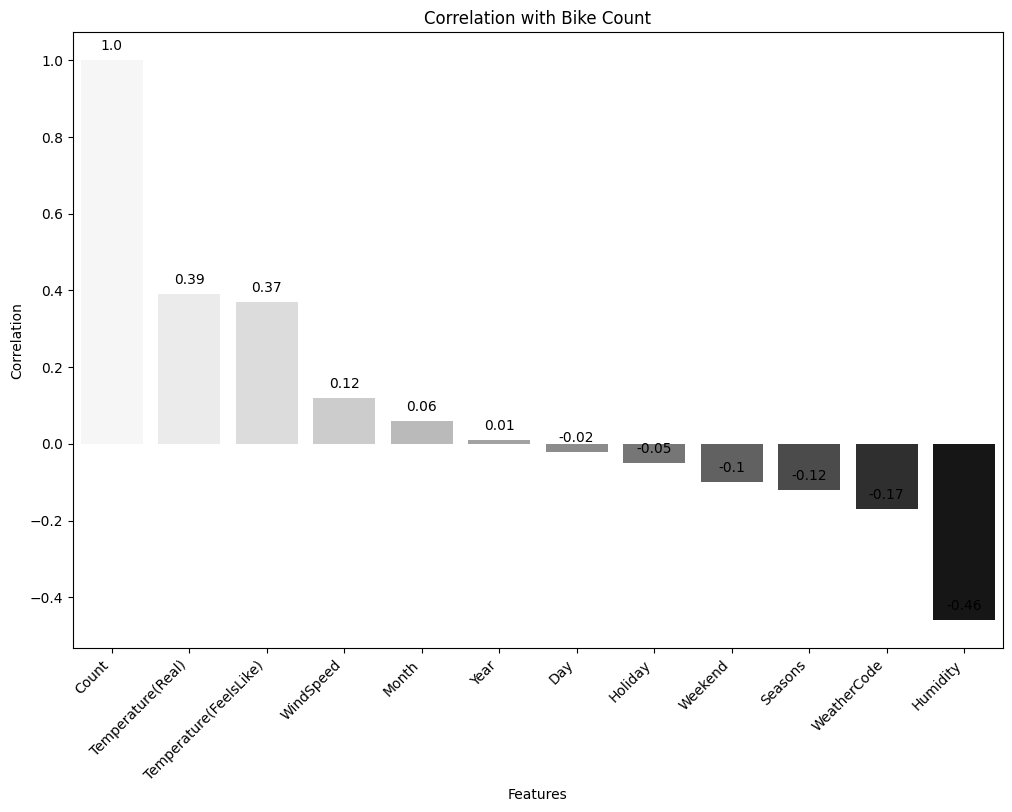

In [ ]:
correlation_matrix = round(df.select_dtypes("number").corr(), 2)

correlation_with_Count = correlation_matrix['Count'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x=correlation_with_Count.index, y=correlation_with_Count.values, palette='Greys')
plt.title('Correlation with Bike Count')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
fig = px.area(df, x='Date', y=['Count'], title='Bike Count over the time', color_discrete_sequence=['#808080'])

fig.update_layout(
    plot_bgcolor='lightgray',
    paper_bgcolor='white'
)

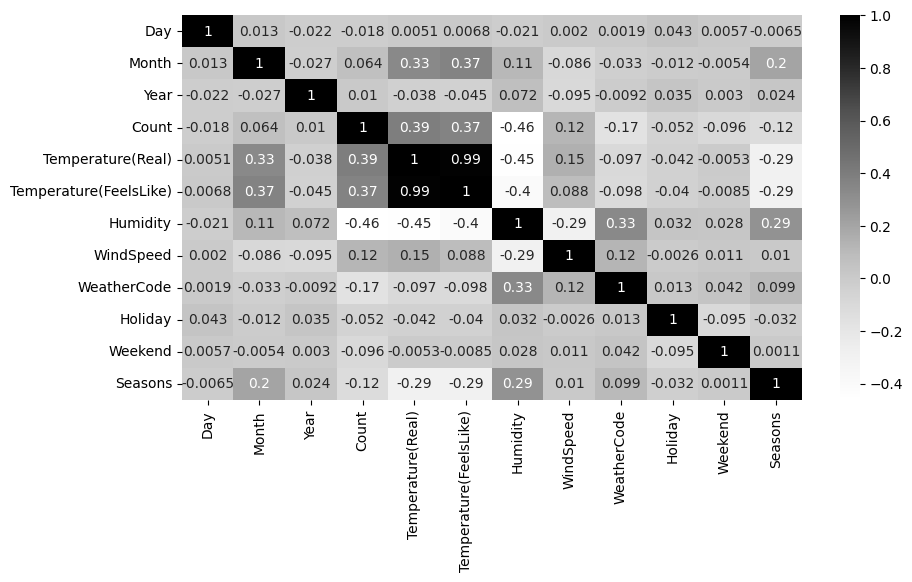

In [ ]:
df_heatmap = df.select_dtypes(include=[float, int])

plt.figure(figsize=(10,5))
sns.heatmap(df_heatmap.corr(), cmap='Greys', annot=True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

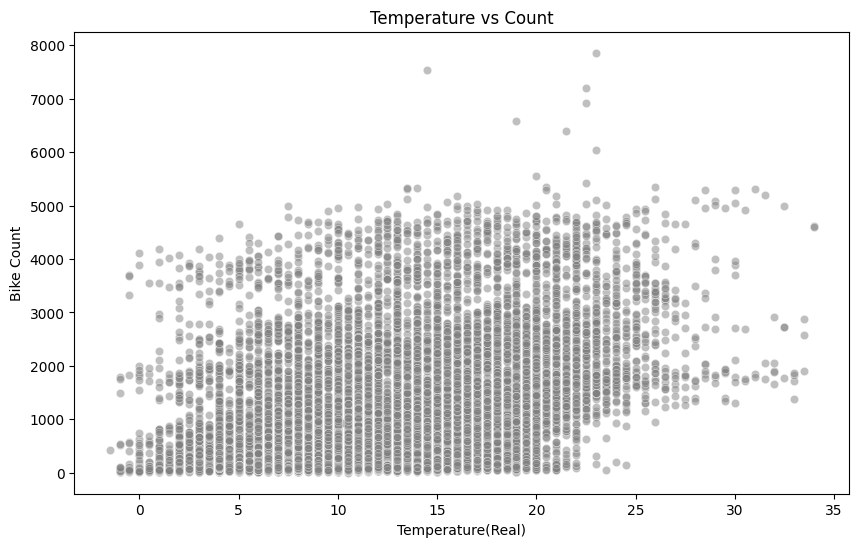

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Temperature(Real)', y='Count', data=df, alpha=0.5, color='grey')
plt.title('Temperature vs Count')
plt.xlabel('Temperature(Real)')
plt.ylabel('Bike Count')
plt.show

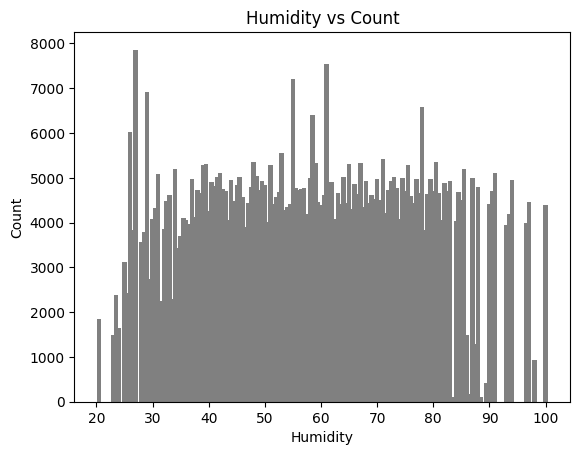

In [ ]:
plt.bar(df['Humidity'], df['Count'], color='grey')

plt.title('Humidity vs Count')
plt.xlabel('Humidity')
plt.ylabel('Count')

plt.show()

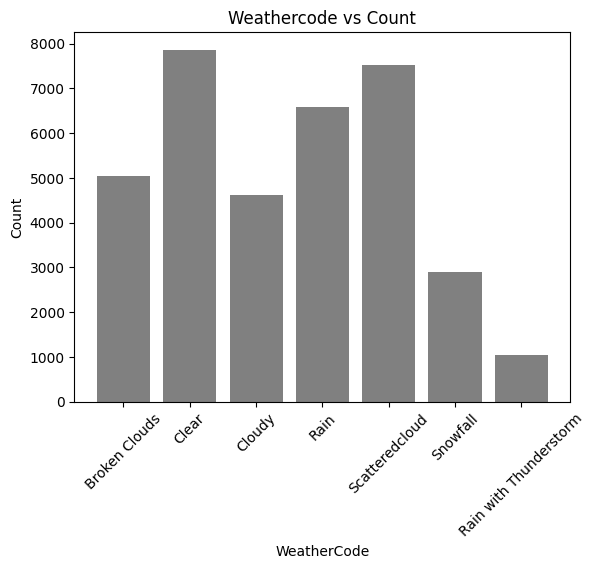

In [ ]:
plt.bar(df['WeatherCode_Labeled'], df['Count'], color='grey')

plt.title('Weathercode vs Count')
plt.xlabel('WeatherCode')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

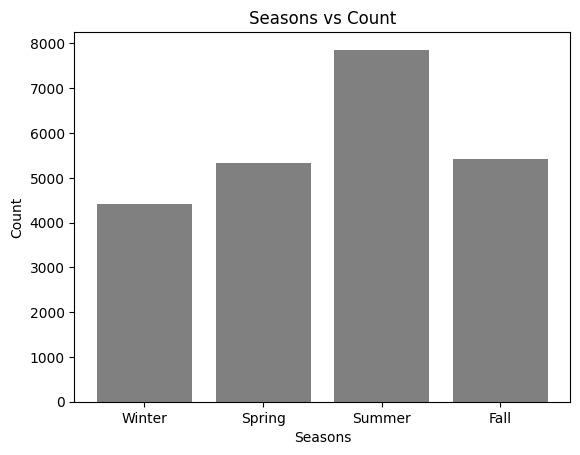

In [ ]:
plt.bar(df['Seasons_Labeled'], df['Count'], color='grey')

plt.title('Seasons vs Count')
plt.xlabel('Seasons')
plt.ylabel('Count')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` 

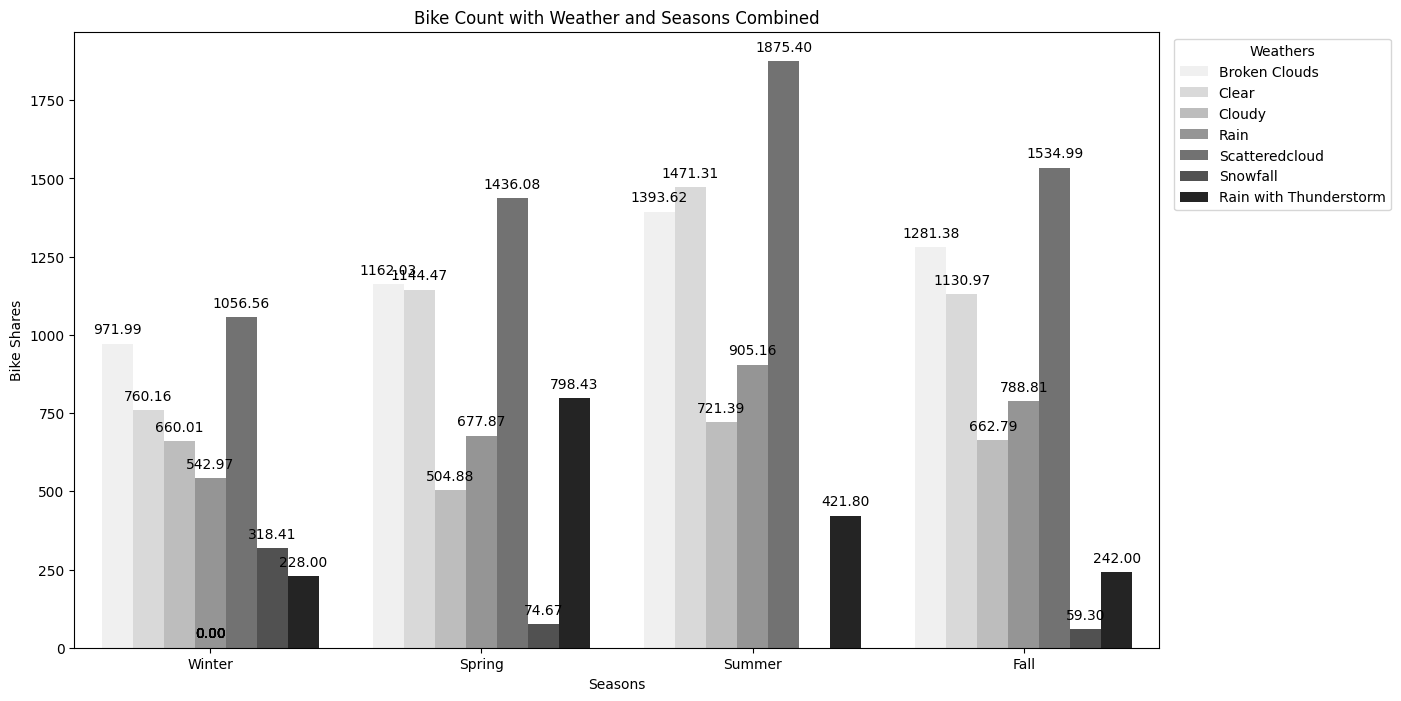

In [ ]:
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=df['Seasons_Labeled'], data=df, palette="Greys", y=df['Count'], hue=df['WeatherCode_Labeled'], errorbar=None)
plt.title('Bike Count with Weather and Seasons Combined')
plt.xlabel('Seasons')
plt.ylabel('Bike Shares')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.legend(bbox_to_anchor = (0.72, 0.5, 0.5, 0.5), title= 'Weathers')
plt.show()

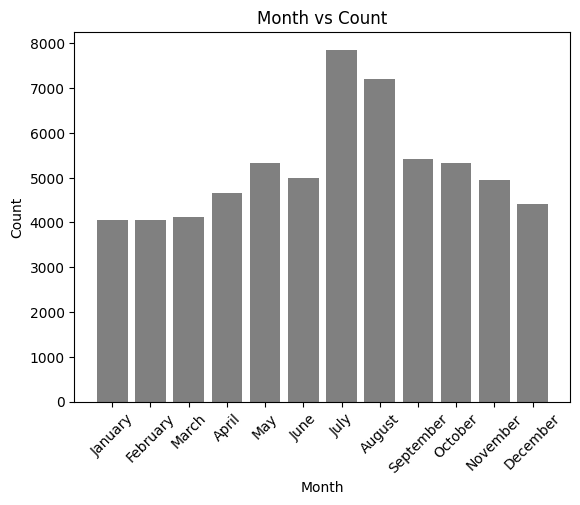

In [ ]:
plt.bar(df['Month_Labeled'], df['Count'], color='grey')
plt.title('Month vs Count')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

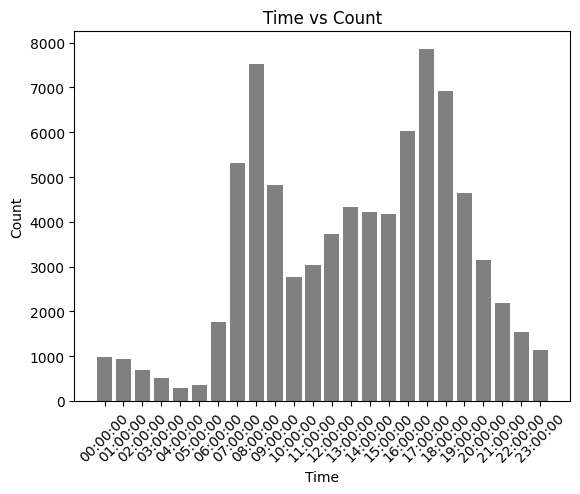

In [ ]:
fig = plt.bar(df['Time'].astype(str), df['Count'], color='grey')

plt.title('Time vs Count')
plt.xlabel('Time')
plt.ylabel('Count')

plt.xticks(rotation=45)

plt.show()

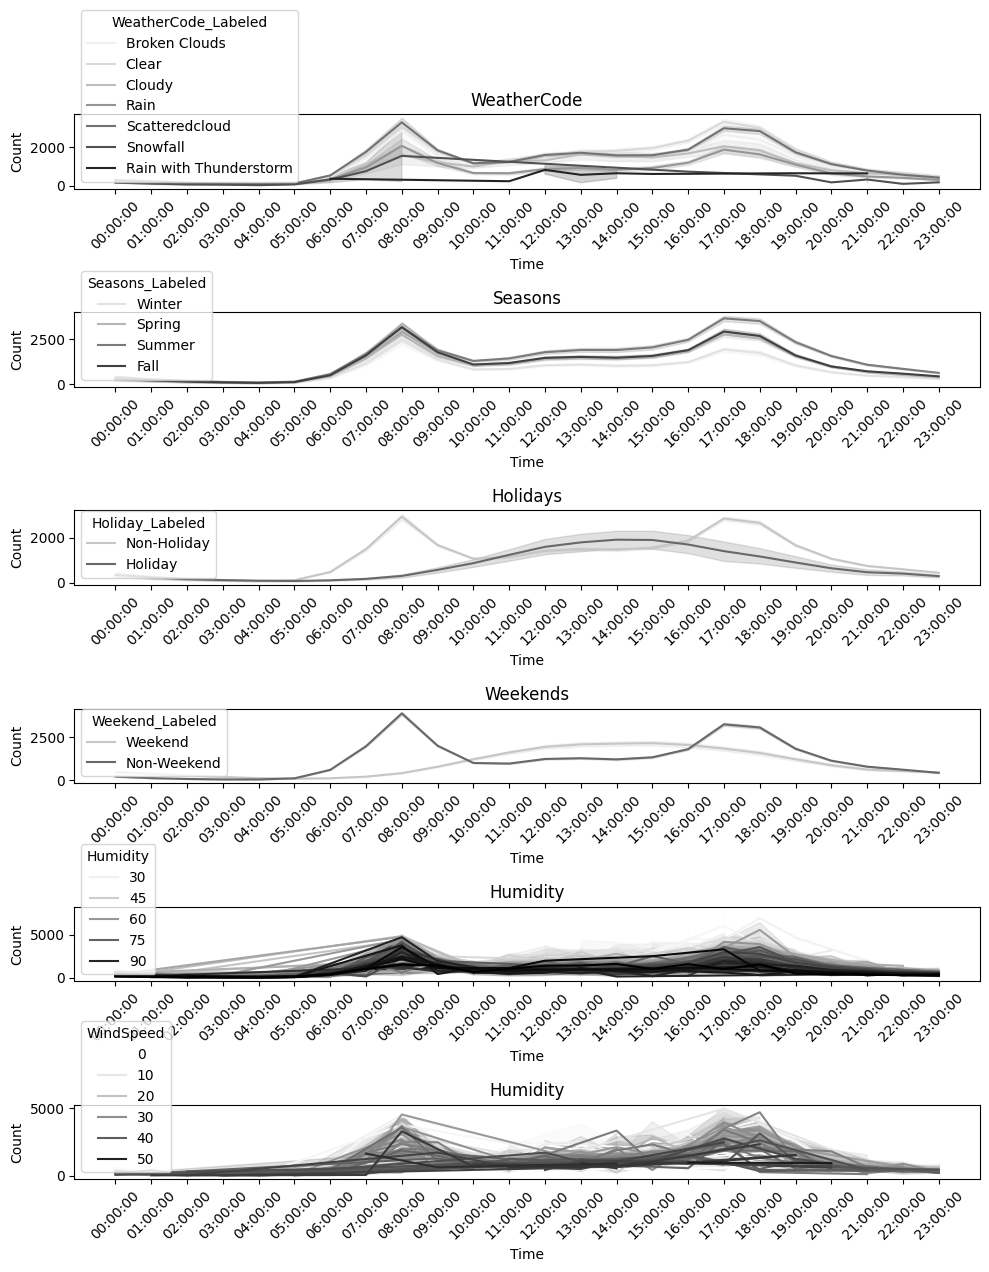

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

df['Time'] = df['Time'].astype(str)

plt.figure(figsize=(10, 12))

# WeatherCode
plt.subplot(6, 1, 1)
sns.lineplot(data= df, x='Time', y='Count', hue="WeatherCode_Labeled", palette="Greys")
plt.title('WeatherCode')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Seasons
plt.subplot(6, 1, 2)
sns.lineplot(data=df, x='Time', y='Count', hue="Seasons_Labeled", palette="Greys")
plt.title('Seasons')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
# Holiday
plt.subplot(6, 1, 3)
sns.lineplot(data=df, x='Time', y='Count', hue="Holiday_Labeled", palette="Greys")
plt.title('Holidays')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Weekend
plt.subplot(6, 1, 4)
sns.lineplot(data=df, x='Time', y='Count', hue="Weekend_Labeled", palette="Greys")
plt.title('Weekends')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Humidity
plt.subplot(6, 1, 5)
sns.lineplot(data=df, x='Time', y='Count', hue="Humidity", palette="Greys")
plt.title('Humidity')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)
# WindSpeed
plt.subplot(6, 1, 6)
sns.lineplot(data=df, x='Time', y='Count', hue="WindSpeed", palette="Greys")
plt.title('Humidity')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<H1> INSIGHTS </H1>
Some of the insights from the above analysis are:


1.  The consumer choose to opt for Bike largly at 8am and 6 pm.
2.   The consumer prefers Cloudy/Scattered Cloud weather to use the service.
3. Weekend and Holiday usage patterns suggest that the consumer uses this service mostly on work days, which can indicate that the use was for work commute.


